In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data and take a very quick look at it
data = pd.read_csv("./Data/jma_nitrate.csv")
data.columns

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16221 entries, 0 to 16220
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16221 non-null  int64  
 1   theta       16221 non-null  float64
 2   sal         16221 non-null  float64
 3   depth       16221 non-null  int64  
 4   nitrate     16221 non-null  float64
 5   lon         16221 non-null  float64
 6   lat         16221 non-null  float64
 7   date        16221 non-null  object 
 8   year        16221 non-null  float64
 9   month       16221 non-null  float64
 10  day         16221 non-null  float64
 11  profile     16221 non-null  float64
 12  cruise      16221 non-null  object 
 13  vessel      16221 non-null  object 
 14  density     16221 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.describe()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,year,month,day,profile,density
count,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000,16221.000000
mean,8110.000000,7.607946,34.435495,1367.990136,20.610818,151.598860,32.558215,2012.292954,6.884964,13.473399,266.572591,26.461316
std,4682.743694,7.618493,0.361891,1522.923213,75.274068,9.713532,9.078474,1.685250,2.660361,8.713440,148.909600,1.353231
min,0.000000,0.034400,32.349200,0.000000,-999.000000,133.990833,0.332167,2010.000000,2.000000,1.000000,1.000000,20.951302
25%,4055.000000,1.654400,34.240900,200.000000,8.300000,145.727833,30.002000,2011.000000,5.000000,6.000000,137.000000,25.605284
50%,8110.000000,3.689800,34.552900,800.000000,35.070000,148.145833,34.230000,2012.000000,7.000000,12.000000,271.000000,27.041943
75%,12165.000000,14.153300,34.683200,2001.000000,39.590000,164.231000,39.503333,2013.000000,9.000000,20.000000,393.000000,27.517416
max,16220.000000,29.923300,35.548100,6161.000000,45.330000,170.035167,49.991500,2016.000000,12.000000,31.000000,529.000000,27.681606


In [7]:
# Since we have a NaN value for nitrate (-999) we need to get rid of that
data = data[data['nitrate']>0]

In [8]:
data.describe()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,year,month,day,profile,density
count,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000
mean,8175.135932,7.042844,34.433404,1418.388211,26.855277,151.599624,32.696928,2012.313664,6.851034,13.509375,268.636766,26.574613
std,4675.484666,7.113994,0.354281,1528.846644,15.480812,9.692016,8.979100,1.684952,2.660677,8.723439,148.651926,1.221275
min,0.000000,0.034400,32.349200,0.000000,0.010000,133.990833,0.332167,2010.000000,2.000000,1.000000,1.000000,20.951302
25%,4105.250000,1.589650,34.240600,203.000000,11.250000,145.727833,30.003333,2011.000000,5.000000,6.000000,139.000000,25.882225
50%,8228.500000,3.418650,34.550800,803.000000,35.350000,148.149667,34.239500,2012.000000,7.000000,12.000000,275.000000,27.094050
75%,12223.750000,12.294850,34.681800,2002.000000,39.797500,164.231000,39.660833,2013.000000,9.000000,20.000000,394.000000,27.527512
max,16220.000000,29.923300,35.548100,6161.000000,45.330000,170.035167,49.991500,2016.000000,12.000000,31.000000,529.000000,27.681606


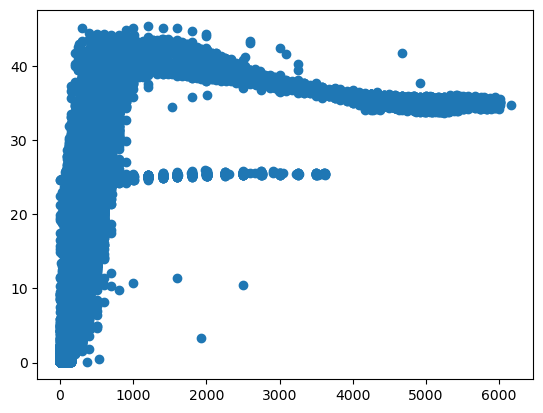

In [20]:
plt.plot(data.depth, data.nitrate, 'o')
# you could also use
# plt.scatter(data.density, data.nitrate)

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Make the data split
y = data.nitrate
X = data[['density']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
# test size is the percentage of test points you want, random state is the "seed" number so people can reproduce what you have done

In [24]:
# just to look and check them
len(X_test)

3115

In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets (fit the model)
regr.fit(X_train, y_train)

LinearRegression()

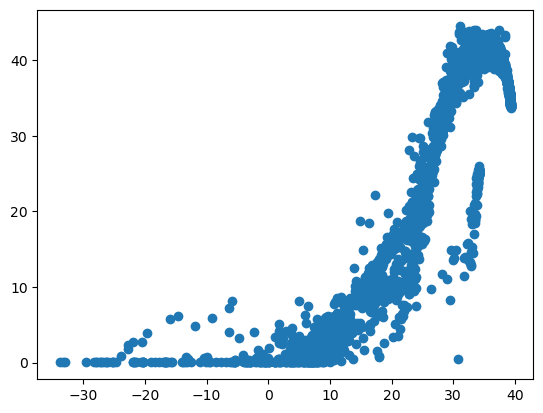

In [29]:
# Make predictions using the testing set (use the fit to find a new prediction)
y_pred = regr.predict(X_test)

plt.plot(y_pred,y_test,'o')

In [31]:
print('r2 =', r2_score(y_train, regr.predict(X_train)))
print('r2 =', r2_score(y_test, y_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test, y_pred)))
# we want to minimize RMSE with our model (its how good our model is)

r2 = 0.7951443371871293
r2 = 0.803767871265734
RMSE = 6.834989498285243


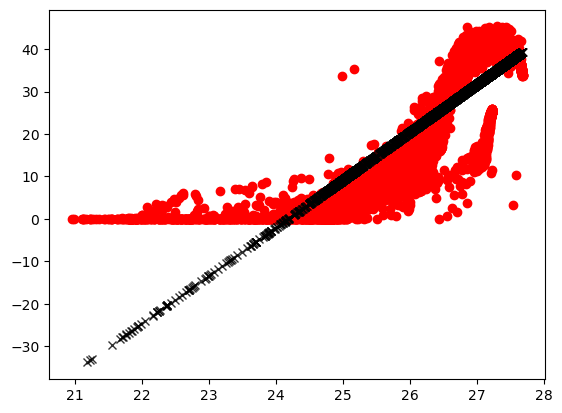

In [27]:
# Plot this to show the linear regression
plt.plot(X_test, y_pred, 'xk', alpha = 0.8)
plt.plot(X_train, y_train, 'or', zorder = 0)
plt.show()